# Ontario Health Premium vs. Taxable Income

This notebook is part of **Assignment 3** for the Data Visualization course.  
It focuses on creating a Python-based data visualization using the **Ontario Health Premium Rates** dataset from the Ontario Open Data Catalogue.

## Objective

To explore and visualize how the **Ontario Health Premium (OHP)** varies with **individual taxable income**.  
This notebook demonstrates:
- Loading and cleaning raw Excel data
- Preparing the dataset for plotting
- Visualizing the relationship between income and health premium using `matplotlib`

## Dataset Source

[Ontario Health Premium Rates – Ontario Open Data Catalogue](https://data.ontario.ca/dataset/ontario-health-premium-rates)  
Direct download: [Excel File](https://data.ontario.ca/dataset/0ac05194-c053-430a-8ffd-0e9bbc28e8f4/resource/c40063e9-1dfa-4e82-acc2-3aaac9838e9b/download/ontario-health-premium-rates-en.xlsx)

---



In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("seaborn-v0_8-whitegrid")

# Display full dataframe columns
pd.set_option('display.max_columns', None)


In [7]:
# Load the Ontario Health Premium Rates dataset
file_path = "ontario-health-premium-rates-en.xlsx"
xls = pd.ExcelFile(file_path)

# Check available sheet names (for debugging)
print(xls.sheet_names)

# Load the relevant sheet
df_raw = xls.parse('ontario-health-premium-rates-en')

# Preview the data
df_raw.head()


['ontario-health-premium-rates-en']


,Individual taxable income in dollar amount,Expected dollar amount to pay in OHP for the tax year
0,"Up to 20,000",0
1,21000,60
2,22000,120
3,23000,180
4,24000,240


In [8]:
import re

# Make a working copy
df = df_raw.copy()

# Rename columns for consistency
df.columns = ['income', 'premium']

# Extract the lower bound from the income column
def extract_lower_bound(value):
    if isinstance(value, str):
        numbers = re.findall(r'\d+', value.replace(',', ''))  # remove commas
        if numbers:
            return int(numbers[0])  # take the first number in the string
    try:
        return float(value)
    except:
        return None

df['income'] = df['income'].apply(extract_lower_bound)

# Convert premium to numeric
df['premium'] = pd.to_numeric(df['premium'], errors='coerce')

# Drop any rows with missing or malformed data
df.dropna(inplace=True)

# Sort the data by income (for plotting)
df.sort_values('income', inplace=True)

# Preview cleaned data
df.head()


,income,premium
0,20000.0,0
1,21000.0,60
2,22000.0,120
3,23000.0,180
4,24000.0,240


Plot saved to: ontario_health_premium_plot.png


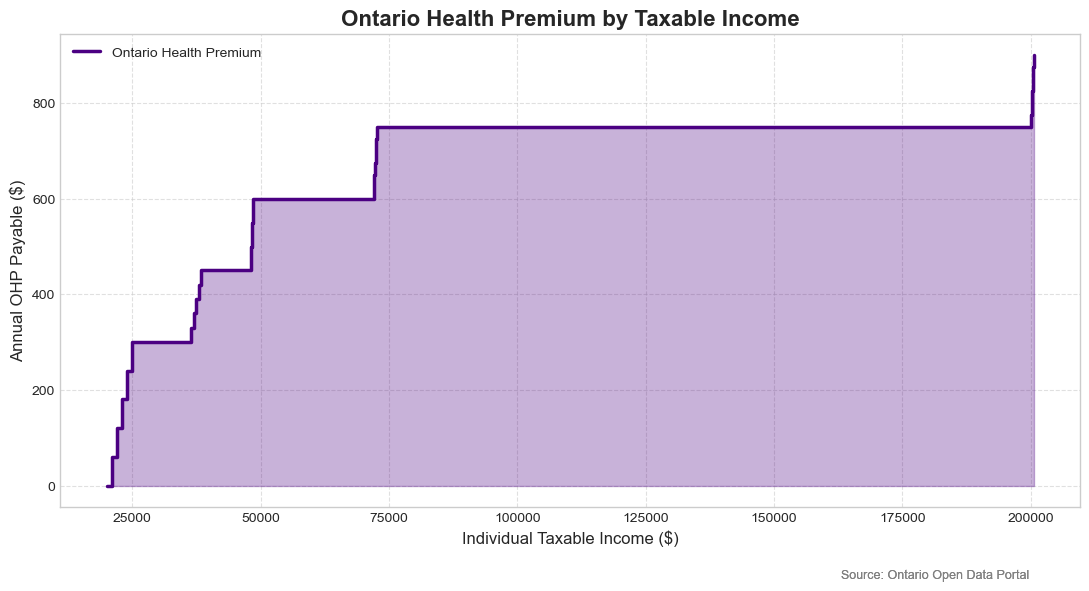

In [9]:
# Create a line plot of Income vs. Health Premium
fig, ax = plt.subplots(figsize=(11, 6))

# Plot the line
ax.step(df['income'], df['premium'],
        where='post',
        color='indigo',
        linewidth=2.5,
        label='Ontario Health Premium')

ax.fill_between(df['income'], df['premium'],
                step='post',
                alpha=0.3,
                color='indigo')

# Lables and Title
ax.set_title("Ontario Health Premium by Taxable Income", fontsize=16, fontweight='bold')
ax.set_xlabel("Individual Taxable Income ($)", fontsize=12)
ax.set_ylabel("Annual OHP Payable ($)", fontsize=12)

# Improve formatting
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(loc='upper left')
ax.text(0.95, -0.15, 'Source: Ontario Open Data Portal',
        transform=ax.transAxes,
        fontsize=9,
        color='gray',
        ha='right')


# Add source annotation
ax.text(0.95, -0.15, 
        'Source: Ontario Open Data Portal', 
        transform=ax.transAxes, 
        fontsize=9, 
        color='gray', 
        ha='right')

plt.tight_layout()

# Export the plot as a PNG image
output_path = "ontario_health_premium_plot.png" 
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"Plot saved to: {output_path}")


plt.show()
